In [12]:
import numpy as np
import matplotlib.pyplot as plt
import qutip
from qutip import *
from qutip_qip.operations import *
from qutip_qip.circuit import QubitCircuit, Gate

In [13]:
print("test")
print(qutip.__version__)

test
5.0.4


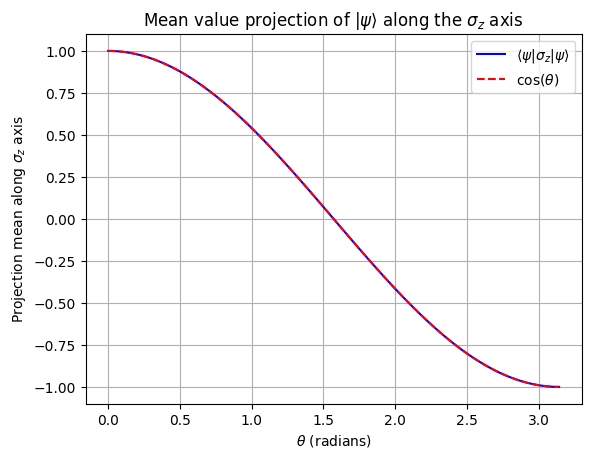

In [14]:
def sigma_z_average(theta, phi=0):
    # État quantique Psi (|Ψ⟩) en fonction de theta et phi
    psi = np.cos(theta / 2) * basis(2, 0) + np.exp(1j * phi) * np.sin(theta / 2) * basis(2, 1)
    
    # Observable sigma_z (matrice de Pauli Z)
    sigma_z = sigmaz()
    
    # Calcul de la valeur moyenne de sigma_z
    return expect(sigma_z, psi)

# Création d'une plage de valeurs pour theta
theta_values = np.linspace(0, np.pi, 100)

# Calcul des valeurs moyennes de sigma_z pour chaque theta
sigma_z_averages = [sigma_z_average(theta) for theta in theta_values]

# Affichage du graphique
plt.plot(theta_values, sigma_z_averages,'b',label = '$ \\langle \psi | \\sigma_z|\psi\\rangle$')
plt.plot(theta_values, np.cos(theta_values), 'r--', label='cos($\\theta$)')
plt.title("Mean value projection of $|\psi\\rangle$ along the $\\sigma_z$ axis")
plt.xlabel("$\\theta$ (radians)")
plt.ylabel("Projection mean along $\\sigma_z$ axis") #### cette ligne aurait pu fonctionner aussi : plt.ylabel(rf"$\psi_{i}(x)$")
plt.grid(True)
plt.legend()
plt.show()


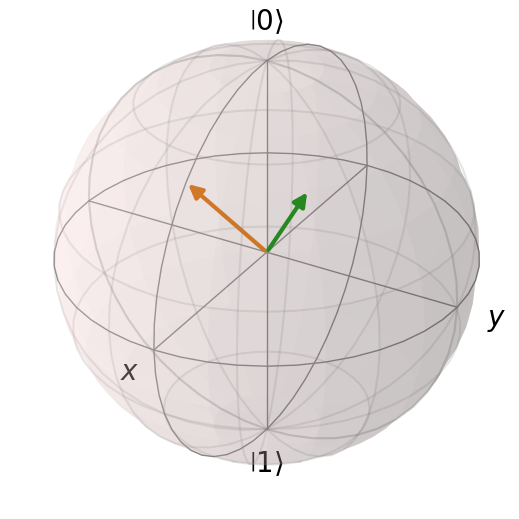

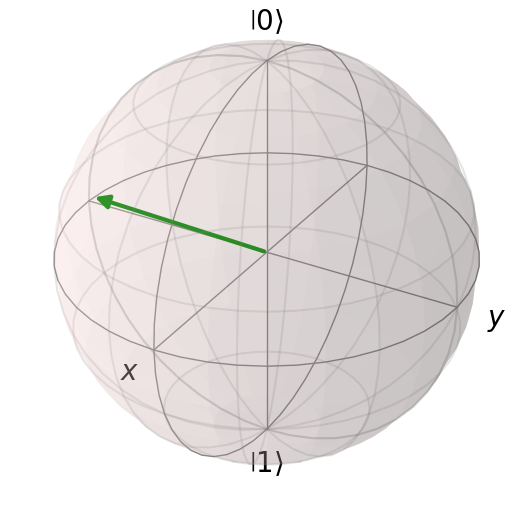

In [15]:
# Paramètres theta et phi (qui définissent l'état initial du qubit sur la sphère de Bloch)
theta = 1* np.pi / 4  # Angle theta (polaire)
phi = 1* np.pi / 4    # Angle phi (azimutal)

# Définition de l'état |psi> en fonction de theta et phi
psi = np.cos(theta / 2) * basis(2, 0) + np.exp(1j * phi) * np.sin(theta / 2) * basis(2, 1)

# Création de la sphère de Bloch pour l'état initial
bloch_sphere_initial = Bloch()
bloch_sphere_initial.add_states(psi)

# Vecteur de l'axe de rotation Hadamard (à 45 degrés dans le plan XZ)
hadamard_axis = [1/np.sqrt(2), 0, 1/np.sqrt(2)]

# Ajout de l'axe de rotation sur la sphère de Bloch
bloch_sphere_initial.add_vectors(hadamard_axis)
bloch_sphere_initial.show()

# Définition de la porte de Hadamard
H = snot()

# Appliquer la porte de Hadamard à l'état |psi>
psi_hadamard = H * psi

# Création de la sphère de Bloch pour l'état après Hadamard
bloch_sphere_hadamard = Bloch()
bloch_sphere_hadamard.add_states(psi_hadamard)
bloch_sphere_hadamard.show()


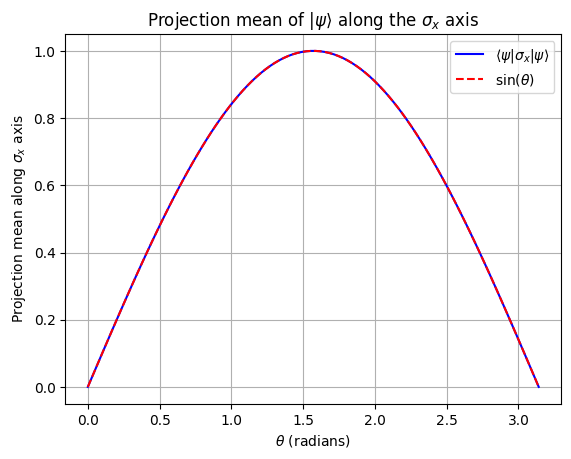

In [16]:
def sigma_x_average(theta, phi=0):
    # État quantique Psi (|Ψ⟩) en fonction de theta et phi
    psi = np.cos(theta / 2) * basis(2, 0) + np.exp(1j * phi) * np.sin(theta / 2) * basis(2, 1)
    
    # Observable sigma_z (matrice de Pauli Z)
    sigma_x = sigmax()
    
    # Calcul de la valeur moyenne de sigma_z
    return expect(sigma_x, psi)

# Création d'une plage de valeurs pour theta
theta_values = np.linspace(0, np.pi, 100)

# Calcul des valeurs moyennes de sigma_z pour chaque theta
sigma_x_averages = [sigma_x_average(theta) for theta in theta_values]

# Affichage du graphique
plt.plot(theta_values, sigma_x_averages,'b',label = '$ \\langle \psi | \\sigma_x|\psi\\rangle$')
plt.plot(theta_values, np.sin(theta_values), 'r--', label='sin($\\theta$)')
plt.title("Projection mean of $|\psi\\rangle$ along the $\\sigma_x$ axis")
plt.xlabel("$\\theta$ (radians)")
plt.ylabel("Projection mean along $\\sigma_x$ axis") #### cette ligne aurait pu fonctionner aussi : plt.ylabel(rf"$\psi_{i}(x)$")
plt.grid(True)
plt.legend()
plt.show()

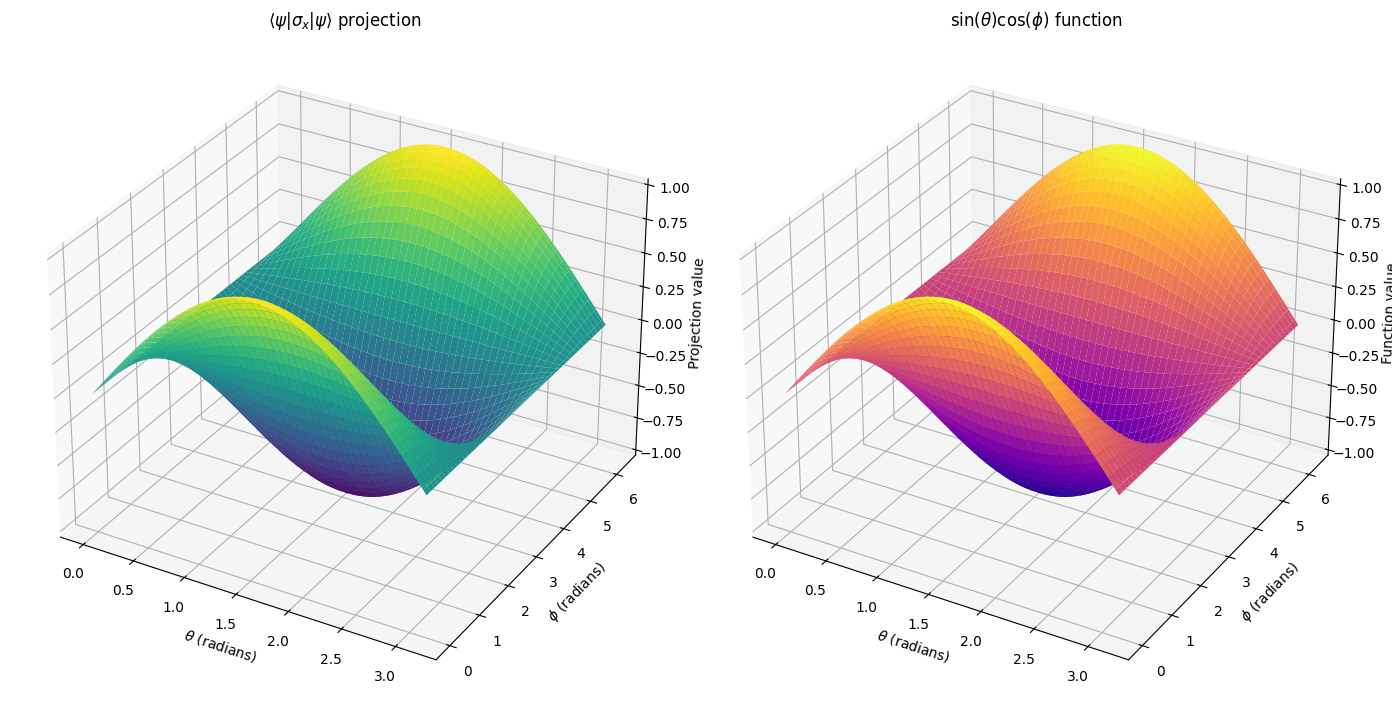

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from qutip import *

def sigma_x_average(theta, phi):
    # État quantique Psi (|Ψ⟩) en fonction de theta et phi
    psi = np.cos(theta / 2) * basis(2, 0) + np.exp(1j * phi) * np.sin(theta / 2) * basis(2, 1)
    
    # Observable sigma_x (matrice de Pauli X)
    sigma_x = sigmax()
    
    # Calcul de la valeur moyenne de sigma_x
    return expect(sigma_x, psi)

# Création d'une plage de valeurs pour theta et phi
theta_values = np.linspace(0, np.pi, 100)
phi_values = np.linspace(0, 2 * np.pi, 100)

# Création d'une grille 2D pour theta et phi
theta_grid, phi_grid = np.meshgrid(theta_values, phi_values)

# Calcul des valeurs moyennes de sigma_x pour chaque paire (theta, phi)
sigma_x_averages = np.array([[sigma_x_average(theta, phi) for theta in theta_values] for phi in phi_values])

# Calcul de la fonction sin(theta) * cos(phi) pour chaque paire (theta, phi)
sin_theta_cos_phi = np.sin(theta_grid) * np.cos(phi_grid)

# Création d'une figure avec deux sous-graphiques côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(14, 7))

# Tracé de la surface 3D pour <psi | sigma_x | psi> sur le premier graphique
surf1 = ax1.plot_surface(theta_grid, phi_grid, sigma_x_averages, cmap='viridis')
ax1.set_title(r'$ \langle \psi | \sigma_x | \psi \rangle$ projection')
ax1.set_xlabel(r'$\theta$ (radians)')
ax1.set_ylabel(r'$\phi$ (radians)')
ax1.set_zlabel(r'Projection value')

# Tracé de la surface 3D pour sin(theta) * cos(phi) sur le deuxième graphique
surf2 = ax2.plot_surface(theta_grid, phi_grid, sin_theta_cos_phi, cmap='plasma')
ax2.set_title(r'$\sin(\theta) \cos(\phi)$ function')
ax2.set_xlabel(r'$\theta$ (radians)')
ax2.set_ylabel(r'$\phi$ (radians)')
ax2.set_zlabel(r'Function value')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()


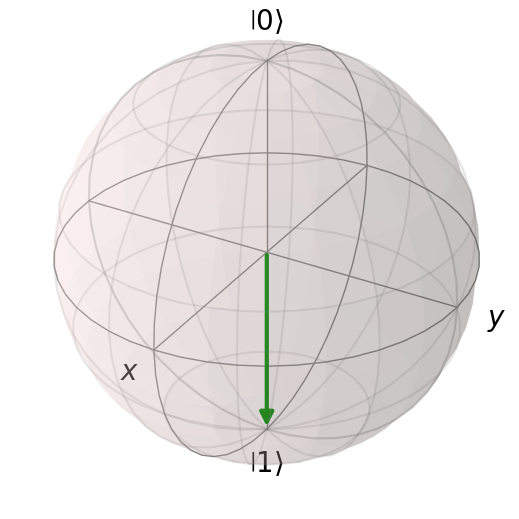

La transformation unitaire est : Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[6.25658655e-17-0.70710678j 4.57199908e-17-0.70710678j]
 [6.41318381e-17-0.70710678j 2.21412824e-17+0.70710678j]]
fin


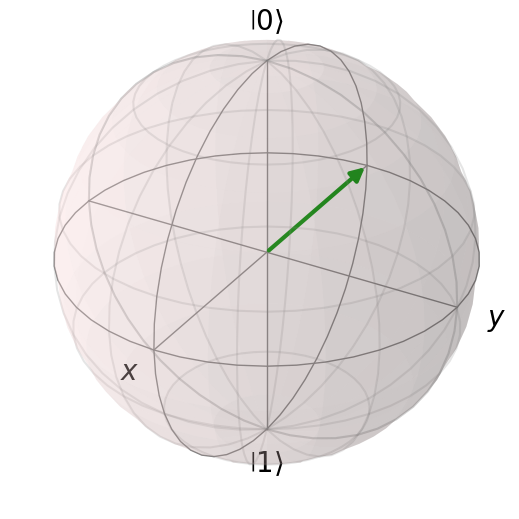

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[4.57199908e-17-0.70710678j]
 [2.21412824e-17+0.70710678j]]


In [18]:
## Code pour M=(X+Z)/sqrt2

def apply_rotation_x(alpha, theta, phi):
    """
    Applique la transformation exp(-i*alpha*X) à un état placé sur la sphère de Bloch.

    Arguments :
    alpha : float, l'angle de rotation autour de l'axe X.
    theta : float, l'angle theta de l'état initial sur la sphère de Bloch (en radians).
    phi : float, l'angle phi de l'état initial sur la sphère de Bloch (en radians).

    Retourne :
    psi_prime : Qobj, l'état transformé après la rotation.
    """

    # Définir l'état initial sur la sphère de Bloch en fonction de theta et phi
    psi = (np.cos(theta / 2) * basis(2, 0) +
           np.exp(1j * phi) * np.sin(theta / 2) * basis(2, 1))

    # Création de la sphère de Bloch pour l'état initial
    bloch_sphere_initial = Bloch()
    bloch_sphere_initial.add_states(psi)
    bloch_sphere_initial.title = "Initial state |psi>"
    bloch_sphere_initial.show()


    # Matrice de Pauli X
    X = sigmax()
    Z = sigmaz()
    # Appliquer la transformation exp(-i * alpha/2 * X)
    U = (-1j * alpha/2 * (X+Z)/np.sqrt(2)).expm()
    print("La transformation unitaire est :",U)
    print("fin")
    # Appliquer la rotation à l'état initial
    psi_prime = U * psi
    
    # Création de la sphère de Bloch pour l'état après Hadamard
    bloch_sphere_hadamard = Bloch()
    bloch_sphere_hadamard.add_states(psi_prime)
    bloch_sphere_hadamard.title = "State after Hadamard gate"
    bloch_sphere_hadamard.show()
    
    return psi_prime

# Exemple d'utilisation
alpha = 4*np.pi / 4  # Rotation de pi/4 autour de X
theta = 4*np.pi / 4 # État initial avec angle theta
phi = 0*np.pi / 2    # État initial avec angle phi

# Appliquer la rotation
psi_prime = apply_rotation_x(alpha, theta, phi)

# Afficher l'état final
print(psi_prime)


L'état initial est le suivant


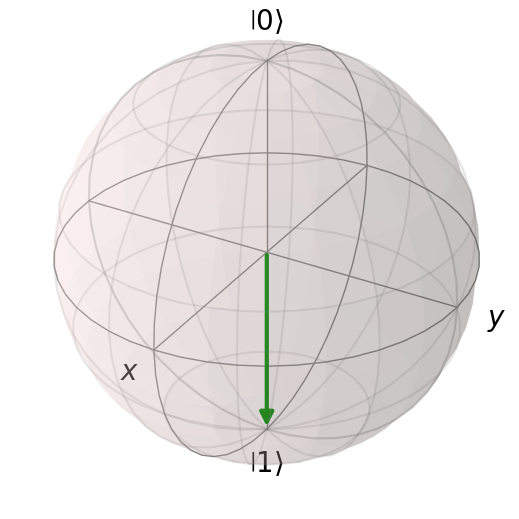

Après la rotation autour de X nous avons :


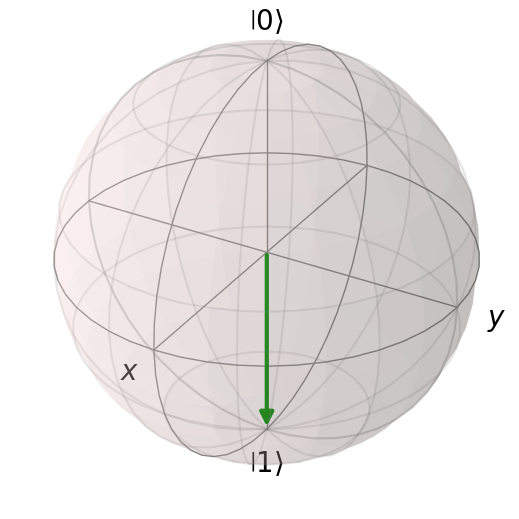

Après la rotation autour de Z nous avons :


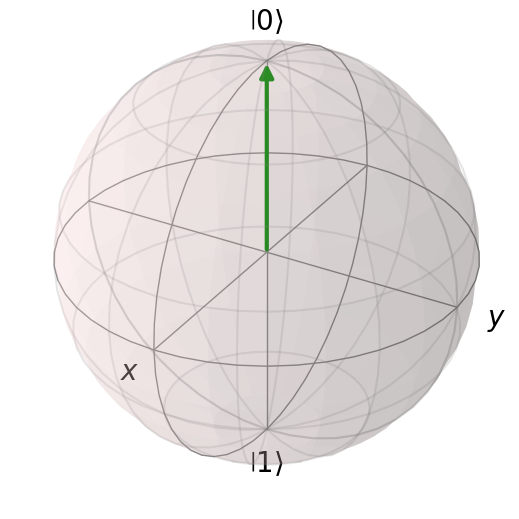

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[4.57199908e-17-0.70710678j]
 [2.21412824e-17+0.70710678j]]


In [19]:
##Code de vérification de l'ordre d'application :

def apply_rotation_x(alpha, theta, phi):
    """
    Applique la transformation exp(-i*alpha*X) à un état placé sur la sphère de Bloch.

    Arguments :
    alpha : float, l'angle de rotation autour de l'axe X.
    theta : float, l'angle theta de l'état initial sur la sphère de Bloch (en radians).
    phi : float, l'angle phi de l'état initial sur la sphère de Bloch (en radians).

    Retourne :
    psi_prime : Qobj, l'état transformé après la rotation.
    """

    # Définir l'état initial sur la sphère de Bloch en fonction de theta et phi
    psi = (np.cos(theta / 2) * basis(2, 0) +
           np.exp(1j * phi) * np.sin(theta / 2) * basis(2, 1))
    print("L'état initial est le suivant")
    # Création de la sphère de Bloch pour l'état initial
    bloch_sphere_initial = Bloch()
    bloch_sphere_initial.add_states(psi)
    bloch_sphere_initial.title = "Initial state |psi>"
    bloch_sphere_initial.show()


    # Matrice de Pauli X
    X = sigmax()
    Z = sigmaz()
    # Appliquer la transformation exp(-i * alpha/2 * X)
    U1 = (-1j * alpha/2 * X).expm()
    U2 = (-1j * alpha/2 * Z).expm()
    # Appliquer la rotation à l'état initial
    psi_prime1 = U2 * psi
    print("Après la rotation autour de X nous avons :")
    # Création de la sphère de Bloch pour l'état après Hadamard
    bloch_sphere_hadamard = Bloch()
    bloch_sphere_hadamard.add_states(psi_prime1)
    bloch_sphere_hadamard.title = "State after Hadamard gate"
    bloch_sphere_hadamard.show()
    
    # Appliquer la rotation à l'état initial
    psi_prime2 = U1 * psi_prime1
    print("Après la rotation autour de Z nous avons :")
    # Création de la sphère de Bloch pour l'état après Hadamard
    bloch_sphere_hadamard = Bloch()
    bloch_sphere_hadamard.add_states(psi_prime2)
    bloch_sphere_hadamard.title = "State after Hadamard gate"
    bloch_sphere_hadamard.show()
    
    return psi_prime

# Exemple d'utilisation
alpha = 4*np.pi / 4  # Rotation de pi/4 autour de X
theta = 4*np.pi / 4 # État initial avec angle theta
phi = 0*np.pi / 2    # État initial avec angle phi

# Appliquer la rotation
psi_prime = apply_rotation_x(alpha, theta, phi)


# Afficher l'état final
print(psi_prime)


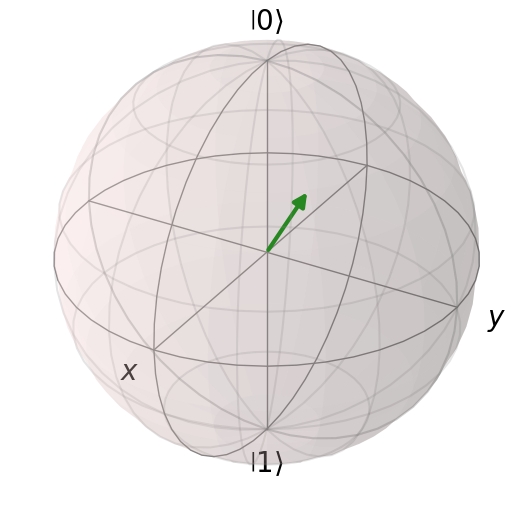

La transformation unitaire est : Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 2.12321156e-16+0.j         -7.07106781e-01-0.70710678j]
 [ 7.07106781e-01-0.70710678j -1.06160578e-16+0.j        ]]
fin


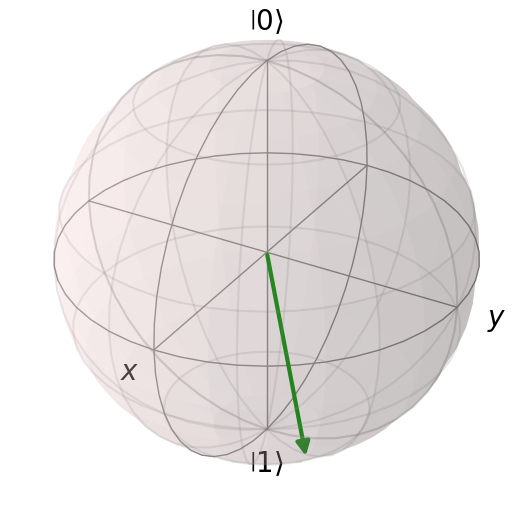

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.38777878e-16-0.38268343j]
 [6.53281482e-01-0.65328148j]]


In [20]:
## Code pour M=(X+Y)/sqrt2

def apply_rotation_x(alpha, theta, phi):
    """
    Applique la transformation exp(-i*alpha*X) à un état placé sur la sphère de Bloch.

    Arguments :
    alpha : float, l'angle de rotation autour de l'axe X.
    theta : float, l'angle theta de l'état initial sur la sphère de Bloch (en radians).
    phi : float, l'angle phi de l'état initial sur la sphère de Bloch (en radians).

    Retourne :
    psi_prime : Qobj, l'état transformé après la rotation.
    """

    # Définir l'état initial sur la sphère de Bloch en fonction de theta et phi
    psi = (np.cos(theta / 2) * basis(2, 0) +
           np.exp(1j * phi) * np.sin(theta / 2) * basis(2, 1))

    # Création de la sphère de Bloch pour l'état initial
    bloch_sphere_initial = Bloch()
    bloch_sphere_initial.add_states(psi)
    bloch_sphere_initial.title = "Initial state |psi>"
    bloch_sphere_initial.show()


    # Matrice de Pauli X
    X = sigmax()
    Y = sigmay()
    # Appliquer la transformation exp(-i * alpha/2 * X)
    U = (-1j * alpha/2 * (X+Y)/np.sqrt(2)).expm()
    print("La transformation unitaire est :",U)
    print("fin")
    # Appliquer la rotation à l'état initial
    psi_prime = U * psi
    
    # Création de la sphère de Bloch pour l'état après Hadamard
    bloch_sphere_hadamard = Bloch()
    bloch_sphere_hadamard.add_states(psi_prime)
    bloch_sphere_hadamard.title = "State after Hadamard gate"
    bloch_sphere_hadamard.show()
    
    return psi_prime

# Exemple d'utilisation
alpha = 4*np.pi / 4  # Rotation de pi/4 autour de X
theta = np.pi / 4 # État initial avec angle theta
phi = np.pi / 4    # État initial avec angle phi

# Appliquer la rotation
psi_prime = apply_rotation_x(alpha, theta, phi)

# Afficher l'état final
print(psi_prime)


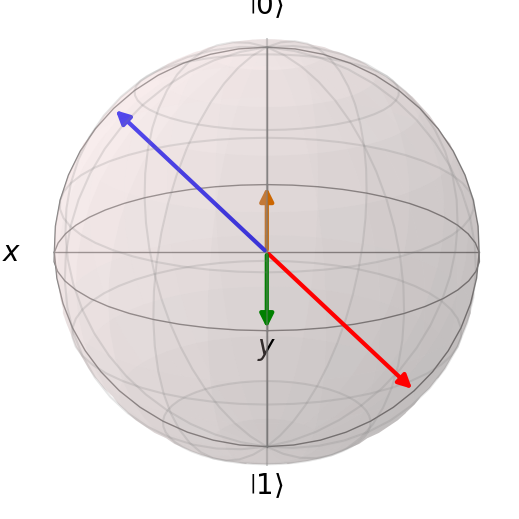

In [26]:
##Psi state with Hadamard axis and result of the application of the gate


# Paramètres theta et phi (qui définissent l'état initial du qubit sur la sphère de Bloch)
theta = 2* np.pi / 4  # Angle theta (polaire)
phi = 2* np.pi / 4    # Angle phi (azimutal)

# Définition de l'état |psi> en fonction de theta et phi
psi = np.cos(theta / 2) * basis(2, 0) + np.exp(1j * phi) * np.sin(theta / 2) * basis(2, 1)

# Définition de la porte de Hadamard
H = snot()

# Appliquer la porte de Hadamard à l'état |psi>
psi_hadamard = H * psi

# Création de la sphère de Bloch pour l'état initial et l'état après Hadamard
bloch_sphere_combined = Bloch()

# Ajout de l'état initial |psi> sur la sphère de Bloch
bloch_sphere_combined.add_states(psi)

# Ajout de l'état après Hadamard H|psi> sur la sphère de Bloch
bloch_sphere_combined.add_states(psi_hadamard)

# Vecteur de l'axe de rotation Hadamard (à 45 degrés dans le plan XZ)
hadamard_axis1 = [1/np.sqrt(2), 0, 1/np.sqrt(2)]

# Ajout de l'axe de rotation sur la sphère de Bloch
bloch_sphere_combined.add_vectors(hadamard_axis1)

# Vecteur de l'axe de rotation Hadamard (à 45 degrés dans le plan XZ)
hadamard_axis2 = [-1/np.sqrt(2), 0, -1/np.sqrt(2)]

# Ajout de l'axe de rotation sur la sphère de Bloch
bloch_sphere_combined.add_vectors(hadamard_axis2)

# Changer la perspective (élévation, azimut) - exemple (30° d'élévation et 60° d'azimut)
bloch_sphere_combined.view = [0,20]

# Affichage de la sphère de Bloch combinée
bloch_sphere_combined.show()


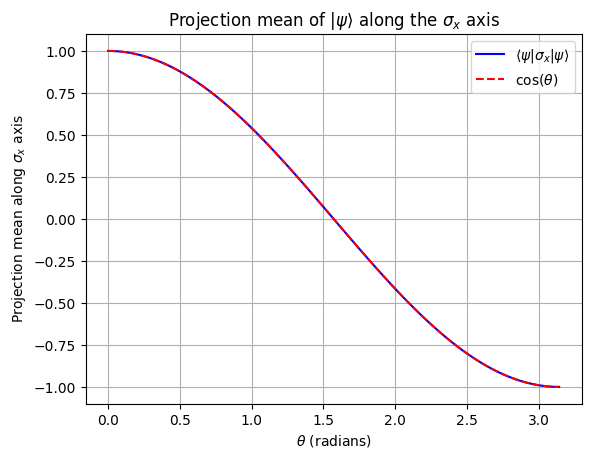

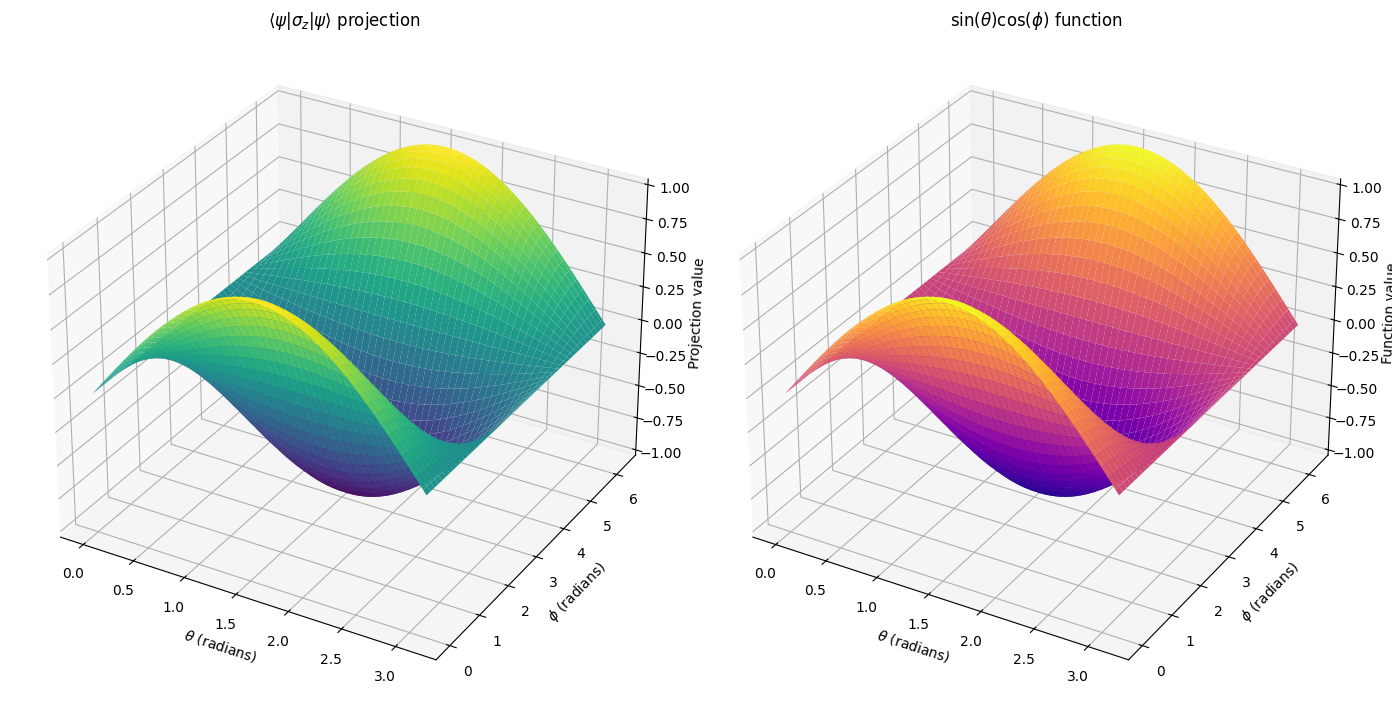

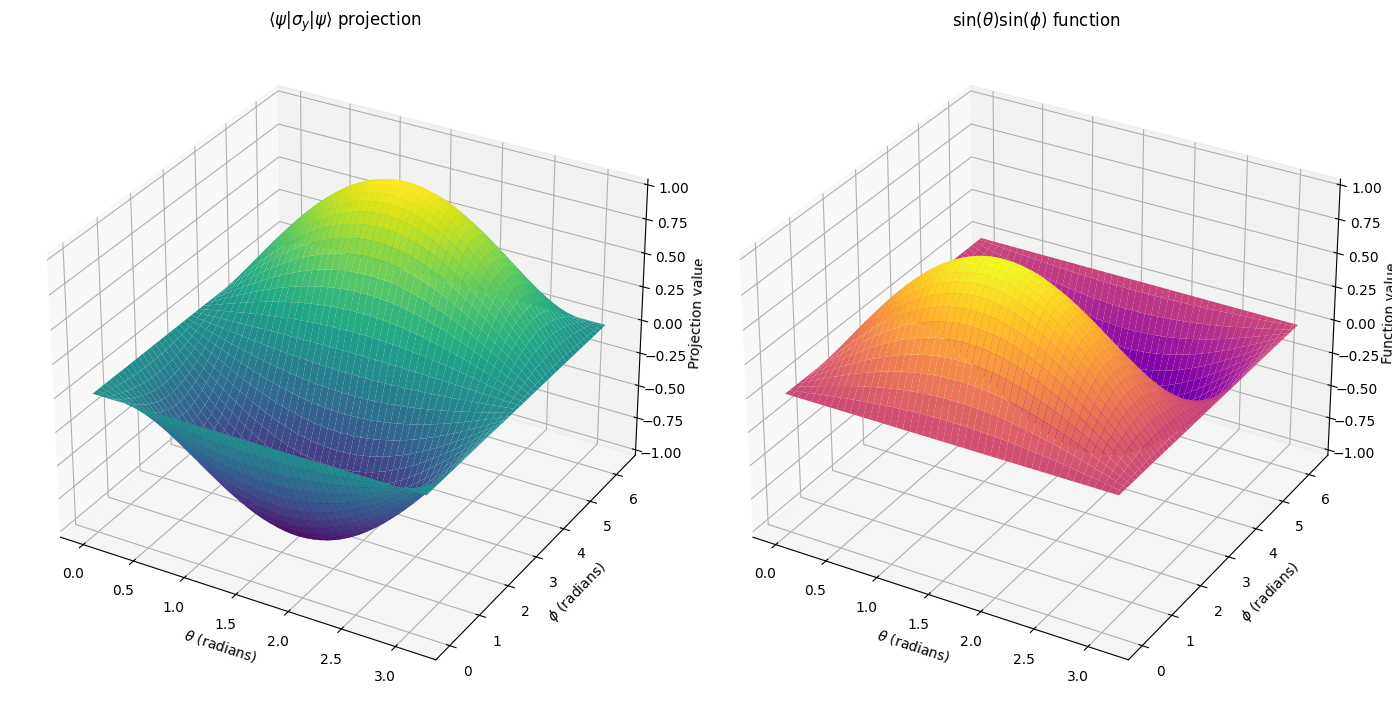

In [22]:
##on veut faire les mesures de X mais sur Z (question 37)

def sigma_x_average(theta, phi=0):
    # État quantique Psi (|Ψ⟩) en fonction de theta et phi
    psi = np.cos(theta / 2) * basis(2, 0) + np.exp(1j * phi) * np.sin(theta / 2) * basis(2, 1)

    # Définition de la porte de Hadamard
    H = snot()

    # Appliquer la porte de Hadamard à l'état |psi>
    psi_hadamard = H * psi
    
    # Observable sigma_z (matrice de Pauli Z)
    sigma_x = sigmax()
    
    # Calcul de la valeur moyenne de sigma_z
    return expect(sigma_x, psi_hadamard)

# Création d'une plage de valeurs pour theta
theta_values = np.linspace(0, np.pi, 100)

# Calcul des valeurs moyennes de sigma_z pour chaque theta
sigma_x_averages = [sigma_x_average(theta) for theta in theta_values]

# Affichage du graphique
plt.plot(theta_values, sigma_x_averages,'b',label = '$ \\langle \psi | \\sigma_x|\psi\\rangle$')
plt.plot(theta_values, np.cos(theta_values), 'r--', label='cos($\\theta$)')
plt.title("Projection mean of $|\psi\\rangle$ along the $\\sigma_x$ axis")
plt.xlabel("$\\theta$ (radians)")
plt.ylabel("Projection mean along $\\sigma_x$ axis") #### cette ligne aurait pu fonctionner aussi : plt.ylabel(rf"$\psi_{i}(x)$")
plt.grid(True)
plt.legend()
plt.show()


def sigma_z_average(theta, phi):
    # État quantique Psi (|Ψ⟩) en fonction de theta et phi
    psi = np.cos(theta / 2) * basis(2, 0) + np.exp(1j * phi) * np.sin(theta / 2) * basis(2, 1)
    
    # Observable sigma_x (matrice de Pauli X)
    sigma_z = sigmaz()

    # Définition de la porte de Hadamard
    H = snot()
    
    # Appliquer la porte de Hadamard à l'état |psi>
    psi_hadamard = H * psi

    # Calcul de la valeur moyenne de sigma_x
    return expect(sigma_z, psi_hadamard)

# Création d'une plage de valeurs pour theta et phi
theta_values = np.linspace(0, np.pi, 100)
phi_values = np.linspace(0, 2 * np.pi, 100)

# Création d'une grille 2D pour theta et phi
theta_grid, phi_grid = np.meshgrid(theta_values, phi_values)

# Calcul des valeurs moyennes de sigma_x pour chaque paire (theta, phi)
sigma_z_averages = np.array([[sigma_z_average(theta, phi) for theta in theta_values] for phi in phi_values])

# Calcul de la fonction sin(theta) * cos(phi) pour chaque paire (theta, phi)
sin_theta_cos_phi = np.sin(theta_grid) * np.cos(phi_grid)

# Création d'une figure avec deux sous-graphiques côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(14, 7))

# Tracé de la surface 3D pour <psi | sigma_x | psi> sur le premier graphique
surf1 = ax1.plot_surface(theta_grid, phi_grid, sigma_z_averages, cmap='viridis')
ax1.set_title(r'$ \langle \psi | \sigma_z | \psi \rangle$ projection')
ax1.set_xlabel(r'$\theta$ (radians)')
ax1.set_ylabel(r'$\phi$ (radians)')
ax1.set_zlabel(r'Projection value')

# Tracé de la surface 3D pour sin(theta) * cos(phi) sur le deuxième graphique
surf2 = ax2.plot_surface(theta_grid, phi_grid, sin_theta_cos_phi, cmap='plasma')
ax2.set_title(r'$\sin(\theta) \cos(\phi)$ function')
ax2.set_xlabel(r'$\theta$ (radians)')
ax2.set_ylabel(r'$\phi$ (radians)')
ax2.set_zlabel(r'Function value')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()


def sigma_y_average(theta, phi):
    # État quantique Psi (|Ψ⟩) en fonction de theta et phi
    psi = np.cos(theta / 2) * basis(2, 0) + np.exp(1j * phi) * np.sin(theta / 2) * basis(2, 1)
    
    # Observable sigma_y (matrice de Pauli Y)
    sigma_y = sigmay()

    # Définition de la porte de Hadamard
    H = snot()
    
    # Appliquer la porte de Hadamard à l'état |psi>
    psi_hadamard = H * psi

    # Calcul de la valeur moyenne de sigma_y
    return expect(sigma_y, psi_hadamard)

# Création d'une plage de valeurs pour theta et phi
theta_values = np.linspace(0, np.pi, 100)
phi_values = np.linspace(0, 2 * np.pi, 100)

# Création d'une grille 2D pour theta et phi
theta_grid, phi_grid = np.meshgrid(theta_values, phi_values)

# Calcul des valeurs moyennes de sigma_y pour chaque paire (theta, phi)
sigma_y_averages = np.array([[sigma_y_average(theta, phi) for theta in theta_values] for phi in phi_values])

# Calcul de la fonction sin(theta) * sin(phi) pour chaque paire (theta, phi)
sin_theta_sin_phi = np.sin(theta_grid) * np.sin(phi_grid)

# Création d'une figure avec deux sous-graphiques côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(14, 7))

# Tracé de la surface 3D pour <psi | sigma_y | psi> sur le premier graphique
surf1 = ax1.plot_surface(theta_grid, phi_grid, sigma_y_averages, cmap='viridis')
ax1.set_title(r'$ \langle \psi | \sigma_y | \psi \rangle$ projection')
ax1.set_xlabel(r'$\theta$ (radians)')
ax1.set_ylabel(r'$\phi$ (radians)')
ax1.set_zlabel(r'Projection value')

# Tracé de la surface 3D pour sin(theta) * sin(phi) sur le deuxième graphique
surf2 = ax2.plot_surface(theta_grid, phi_grid, sin_theta_sin_phi, cmap='plasma')
ax2.set_title(r'$\sin(\theta) \sin(\phi)$ function')
ax2.set_xlabel(r'$\theta$ (radians)')
ax2.set_ylabel(r'$\phi$ (radians)')
ax2.set_zlabel(r'Function value')

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()